## Use case: 
???

## What is it?
 - For classification: ???
   - At each node, the algorithm learns/decides
     - which **feature** is the most useful for classification at that point
     - what **threshold** to use
     - objective: to reduce **impurity** at each node
 - For regression: ???
 

## How?

In [12]:
#| code-summary: define `display_tree`
#| code-fold: true
# Reference: DSCI_571_sup-learn-1/lectures/code/utils.py
import re 
import graphviz

from sklearn.tree import export_graphviz

def display_tree(feature_names, tree, counts=False):
    """ For binary classification only """
    dot = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=tree.classes_.astype(str),
        impurity=False,
    )    
    # adapted from https://stackoverflow.com/questions/44821349/python-graphviz-remove-legend-on-nodes-of-decisiontreeclassifier
    # dot = re.sub('(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])(\\\\nclass = [A-Za-z0-9]+)', '', dot)
    if counts: 
        dot = re.sub("(samples = [0-9]+)\\\\n", "", dot)
        dot = re.sub("value", "counts", dot)
    else:
        dot = re.sub("(\\\\nsamples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])", "", dot)
        dot = re.sub("(samples = [0-9]+)(\\\\nvalue = \[[0-9]+, [0-9]+\])\\\\n", "", dot)

    return graphviz.Source(dot)

In [34]:
#| code-summary: define `plot_tree_decision_boundary_and_tree`
#| code-fold: true
# Reference: DSCI_571_sup-learn-1_students/lectures/code/plotting_functions.py
import matplotlib.pyplot as plt
import mglearn
from sklearn.tree import plot_tree

# Custom function to customize the tree plot and hide values and samples
def custom_plot_tree(tree_model, feature_names=None, class_names=None, **kwargs):
    """
    Customizes and displays a tree plot for a scikit-learn Decision Tree Classifier.

    Parameters:
    - tree (sklearn.tree.DecisionTreeClassifier): The trained Decision Tree Classifier to visualize.
    - width: width of the matplotlib plot in inches 
    - height: height of the matplotlib plot in inches 
    - feature_names (list or None): A list of feature names to label the tree nodes with feature names.
                                    If None, generic feature names will be used.
    - class_names (list or None): A list of class names to label the tree nodes with class names.
                                  If None, generic class names will be used.
    - **kwargs: Additional keyword arguments to be passed to the `sklearn.tree.plot_tree` function.

    Returns:
    - None: The function displays the customized tree plot using Matplotlib.
    
    This function customizes the appearance of a Decision Tree plot generated by the scikit-learn
    `plot_tree` function. It hides both the samples and values in each node of the tree plot
    for improved visualization.
    """    
    plot_tree(tree_model, 
              feature_names=feature_names, 
              class_names=class_names, 
              filled=True, 
              **kwargs)
    
    # Customize the appearance of the text elements for each node
    for text in plt.gca().texts:
        new_text = re.sub('samples = \d+\n', '', text.get_text()) # Hide samples
        text.set_text(new_text) 
    
    plt.show()

def plot_tree_decision_boundary(
    model, X, y, x_label="x-axis", y_label="y-axis", eps=None, ax=None, title=None
):
    if ax is None:
        ax = plt.gca()

    if title is None:
        title = "max_depth=%d" % (model.tree_.max_depth)

    mglearn.plots.plot_2d_separator(
        model, X.to_numpy(), eps=eps, fill=True, alpha=0.5, ax=ax
    )
    mglearn.discrete_scatter(X.iloc[:, 0], X.iloc[:, 1], y, ax=ax)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)

def plot_tree_decision_boundary_and_tree(
    model, X, y, height=6, width=16, fontsize = 9, x_label="x-axis", y_label="y-axis", eps=None
):
    fig, ax = plt.subplots(
        1,
        2,
        figsize=(width, height),
        subplot_kw={"xticks": (), "yticks": ()},
        gridspec_kw={"width_ratios": [1.5, 2]},
    )
    plot_tree_decision_boundary(model, X, y, x_label, y_label, eps, ax=ax[0])
    custom_plot_tree(model, 
                 feature_names=X.columns.tolist(), 
                 class_names=['A+', 'not A+'],
                 impurity=False,
                 fontsize=fontsize, ax=ax[1])
    ax[1].set_axis_off()
    plt.show()

### Classification

In [43]:
#| code-summary: read df
#| code-fold: true
import pandas as pd

df = pd.read_csv("data/quiz2-grade-toy-classification.csv")
df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,A+
1,1,0,94,90,80,83,91,not A+
2,0,0,78,85,83,80,80,not A+
3,0,1,91,94,92,91,89,A+
4,0,1,77,83,90,92,85,A+


In [44]:
from sklearn.tree import DecisionTreeClassifier

y, X = df.pop("quiz2"), df

clf = DecisionTreeClassifier()
clf.fit(X, y)
clf.predict(X)

array(['A+', 'not A+', 'not A+', 'A+', 'A+', 'not A+', 'A+', 'not A+',
       'not A+', 'not A+', 'A+', 'A+', 'A+', 'A+', 'not A+', 'not A+',
       'A+', 'not A+', 'not A+', 'not A+', 'A+'], dtype=object)

In [45]:
clf.score(X, y) # accuracy

1.0

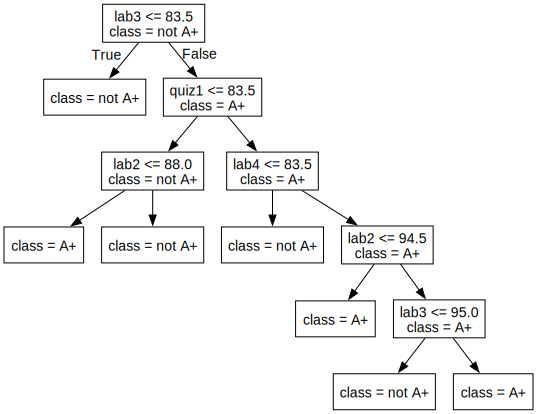

In [46]:
display_tree(X.columns, clf)

#### Decision stump

/Users/johnshiu/miniconda3/envs/571/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


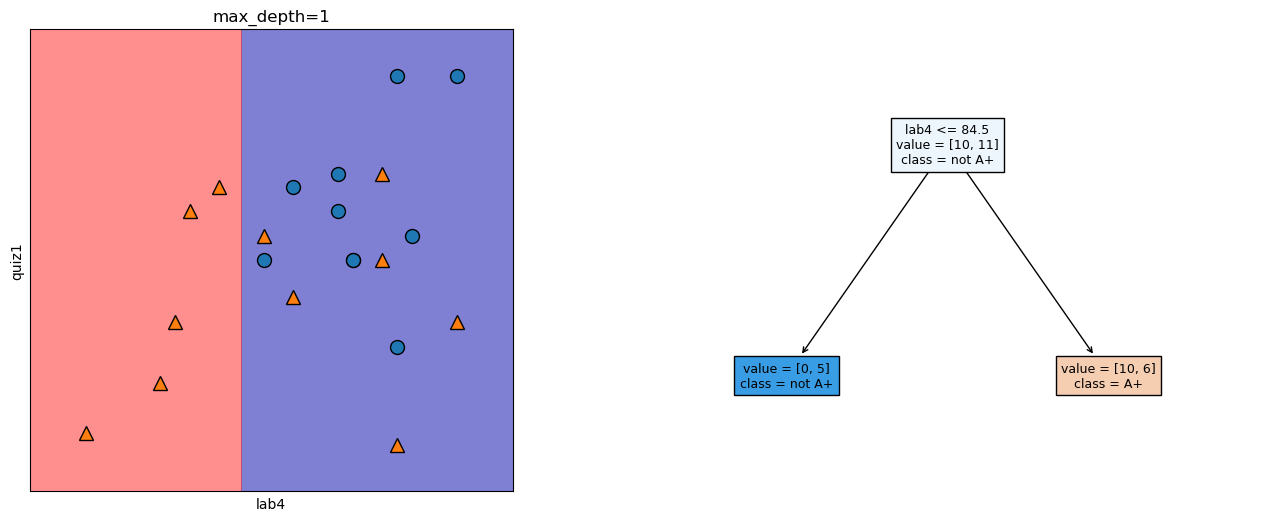

In [40]:
from sklearn.tree import DecisionTreeClassifier

X = df[['lab4', 'quiz1']]

clf = DecisionTreeClassifier(max_depth=1)
clf.fit(X, y)
clf.predict(X)

plot_tree_decision_boundary_and_tree(clf, X, y, x_label='lab4', y_label='quiz1')

### Regression

In [4]:
#| code-summary: read df
#| code-fold: true
import pandas as pd

# Prepare data
df = pd.read_csv("data/quiz2-grade-toy-regression.csv")
df.head()

,ml_experience,class_attendance,lab1,lab2,lab3,lab4,quiz1,quiz2
0,1,1,92,93,84,91,92,90
1,1,0,94,90,80,83,91,84
2,0,0,78,85,83,80,80,82
3,0,1,91,94,92,91,89,92
4,0,1,77,83,90,92,85,90


In [39]:
from sklearn.tree import DecisionTreeRegressor

y, X = df.pop("quiz2"), df

reg = DummyRegressor(strategy="mean")
reg.fit(X, y)
reg.predict(X)

array([86.28571429, 86.28571429, 86.28571429, 86.28571429, 86.28571429,
       86.28571429, 86.28571429])

In [40]:
reg.score(X, y) # R^2 (it can be -ve, which is worse than DummyRegressor)

0.0

## Hyperparameters
 - `criterion` for **minimizing impurity**
   - (`DecisionTreeClassifier`) Default: `gini`
     - `gini`: gini index
     - `entropy`: cross entropy
     - `log_loss`: information gain
   - (`DecisionTreeRegressor`) Default: `squared_error`
     - {`squared_error`, `friedman_mse`, `absolute_error`, `poisson`}
 - `max_depth`, maximum tree depth. Default: `None`
   - If `None`, the decision tree could be creating very specific rules, based on just one example from the data
   - If `max_depth = 1`, the tree is called **Decision stump**
 - `min_samples_split`
 - `min_samples_leaf`
 - `max_leaf_nodes`

## Pros 

## Cons

## Remarks

### ?DecisionTreeClassifier

In [43]:
?DecisionTreeClassifier

Init signature:
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy", "log_loss"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "log_loss" and "entropy" both for the
    Shannon information gain, see :ref:`tree_mathematical_formulation`.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth o

### ?DecisionTreeRegressor

In [44]:
?DecisionTreeRegressor

Init signature:
DecisionTreeRegressor(
    *,
    criterion='squared_error',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    ccp_alpha=0.0,
)
Docstring:     
A decision tree regressor.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
    The function to measure the quality of a split. Supported criteria
    are "squared_error" for the mean squared error, which is equal to
    variance reduction as feature selection criterion and minimizes the L2
    loss using the mean of each terminal node, "friedman_mse", which uses
    mean squared error with Friedman's improvement score for potential
    splits, "absolute_error" for the mean absolute error, which minimizes
    the L1 loss usi

In [ ]:
#| code-fold: true

# import numpy as np
# X_binary = X.copy()
# X_binary.loc[:,"lab1":"quiz1"] = X_binary.loc[:,"lab1":"quiz1"].apply(lambda x: np.where(x >= 90, 1, 0))

# from sklearn.tree import DecisionTreeClassifier
# clf = DecisionTreeClassifier()
# clf.fit(X_binary, y)
# clf.predict(X_binary)

# clf.score(X_binary, y) # accuracy

# display_tree(X_binary.columns, clf)